In [43]:
# Importing libraries initially required
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import os
import cv2
from matplotlib.pyplot import imread
import tensorflow as tf
import gc

In [44]:
# Define image size
IMG_SIZE = 32

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [45]:
# loading the dataset for training and testing.
path = '/content/drive/MyDrive/IMAGE_DATASET'
x_train = []
x_test = []
y_train = []
y_test = []
categories = ['regular','pneumonia','covid']
## ------------0----------1-----------2-----



for cat in categories:
  for im in os.listdir(os.path.join(path,'train_'+cat)):
    img= os.path.join(path,'train_'+cat,im)
    np_img = process_image(img)
    x_train.append(np_img)
    if cat == 'regular':
      y_train.append(0)
    if cat == 'pneumonia':
      y_train.append(1)
    if cat == 'covid':
      y_train.append(2)
  for im in os.listdir(os.path.join(path,'test_'+cat)):
    img= os.path.join(path,'test_'+cat,im)
    np_img = process_image(img)
    x_test.append(np_img)
    if cat == 'regular':
      y_test.append(0)
    if cat == 'pneumonia':
      y_test.append(1)
    if cat == 'covid':
      y_test.append(2)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [46]:
print(x_train.shape)
print(x_test.shape)

(1935, 32, 32, 3)
(491, 32, 32, 3)


In [47]:
#normalizing the data
x_train=x_train/255.0
x_train.shape
x_test=x_test/255.0
x_test.shape

(491, 32, 32, 3)

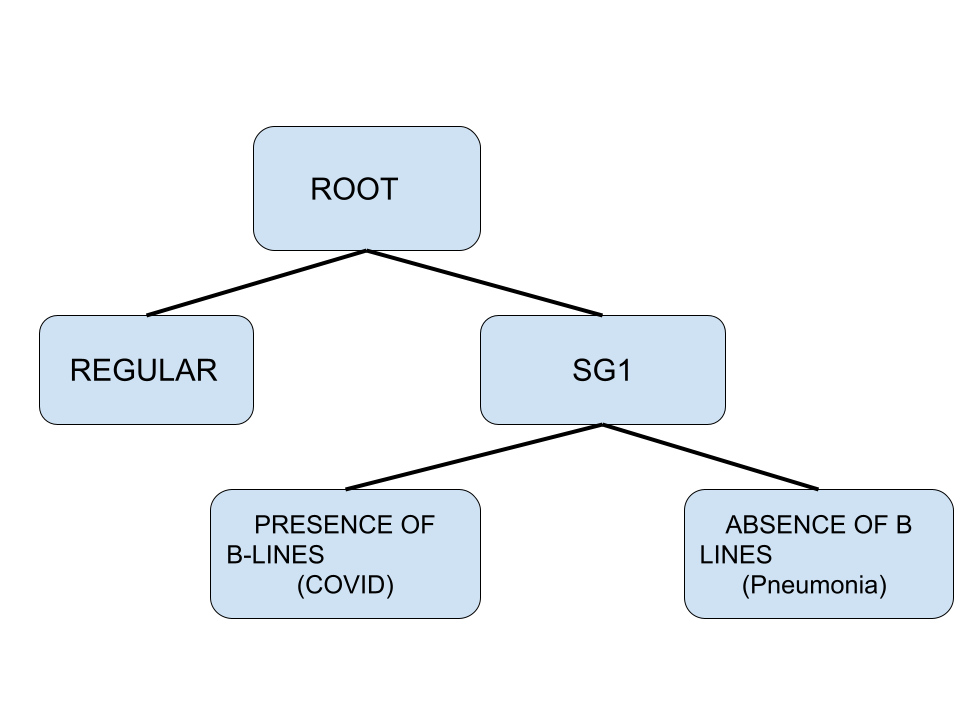

# MNN MODEL

In [48]:
import tensorflow as tf
from tensorflow.keras import models,layers

def root_module():
    conv= models.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same', input_shape = (32,32,3)),
    layers.Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2)),
              ])   
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
              ])  
    out.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    out.fit(x_train,y_train,8,epochs=15)

    return conv, out

In [49]:
print(x_train.shape)
print(x_test.shape)

(1935, 32, 32, 3)
(491, 32, 32, 3)


In [64]:
def sg0_mod(root_conv):
    
    conv= models.Sequential([
    root_conv,
    layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2)),
              ])   
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
              ])  

    return  conv, out


def sg1_mod(root_conv):
    conv= models.Sequential([
        root_conv,
        layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
        layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
        tf.keras.layers.MaxPooling2D((2,2)),
              ])  
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
                  ])  
    return out

In [78]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
root_conv,root=root_module()

Epoch 1/15
242/242 [==============================] - 2s 6ms/step - loss: 1.1243 - accuracy: 0.4584
Epoch 2/15
242/242 [==============================] - 1s 6ms/step - loss: 0.8041 - accuracy: 0.6326
Epoch 3/15
242/242 [==============================] - 1s 6ms/step - loss: 0.3360 - accuracy: 0.8755
Epoch 4/15
242/242 [==============================] - 1s 6ms/step - loss: 0.1842 - accuracy: 0.9406
Epoch 5/15
242/242 [==============================] - 1s 6ms/step - loss: 0.1257 - accuracy: 0.9659
Epoch 6/15
242/242 [==============================] - 1s 6ms/step - loss: 0.0760 - accuracy: 0.9757
Epoch 7/15
242/242 [==============================] - 1s 6ms/step - loss: 0.0530 - accuracy: 0.9850
Epoch 8/15
242/242 [==============================] - 1s 6ms/step - loss: 0.0588 - accuracy: 0.9793
Epoch 9/15
242/242 [==============================] - 1s 6ms/step - loss: 0.0384 - accuracy: 0.9876
Epoch 10/15
242/242 [==============================] - 1s 6ms/step - loss: 0.0345 - accuracy: 0.9881

In [79]:
root.save('root.h5')

In [80]:
import keras
root_mod = tf.keras.models.load_model('root.h5')

loss,va1= root_mod.evaluate(x_test,y_test,8)

62/62 [==============================] - 0s 4ms/step - loss: 5.5220 - accuracy: 0.6273


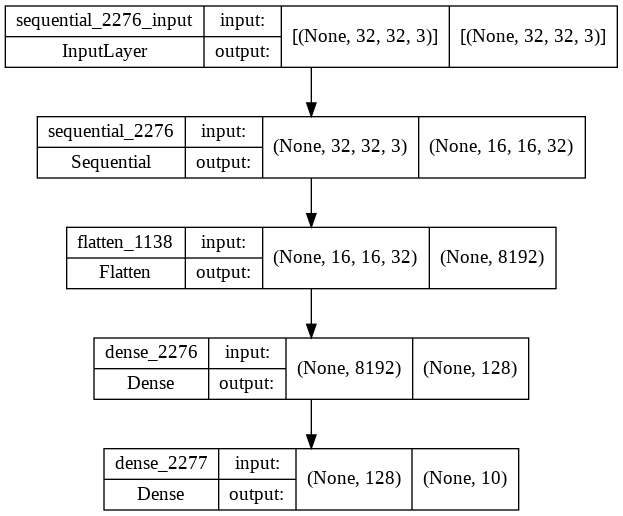

In [81]:
from keras.utils.vis_utils import plot_model
plot_model(root, to_file='root.png', show_shapes=True, show_layer_names=True)

In [82]:
gc.collect()

6627

In [83]:
#from root
MS1=6

#initializing for reference
va2=0
MS2=0
threshold=0.1

def delta_AD(va1,va2,MS1,MS2):
  AD=((va2-va1)/(MS2-MS1))
  return AD

In [84]:
AD_temp=delta_AD(va1,va2,MS1,MS2)

In [85]:
print(AD_temp)
print(va1,va2,MS1,MS2)

print("Accuracy of root node ",va1*100)

0.10454854369163513
0.6272912621498108 0 6 0
Accuracy of root node  62.72912621498108


In [86]:
y=len(y_test)

AD0=AD_temp
AD1=AD_temp

va_g0=0
va_g1=0

batch_size=16
lr=0.0001
opt_02 = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

ep=10

sg1_conv=0
for i in range(y):
    if y_test[i] in [0] :
          if (AD0>threshold):
            print('super group 0 : AD = ',AD0)
            sg0_conv, sg0=sg0_mod(root_conv)
            sg0.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            sg0_details=sg0.fit(x_train, y_train, batch_size, epochs=10)
            loss,va2=sg0.evaluate(x_test,y_test)
            AD0=delta_AD(va1,va2,MS1,MS2)
            va_g0=va2
            print('super group 0 : AD = ',AD0)
            if(AD0<threshold):
                sg0.save('sg0.h5')
            MS2=9
gc.collect()

super group 0 : AD =  0.10454854369163513
Epoch 1/10
121/121 [==============================] - 2s 10ms/step - loss: 0.4217 - accuracy: 0.8424
Epoch 2/10
121/121 [==============================] - 1s 10ms/step - loss: 0.1282 - accuracy: 0.9550
Epoch 3/10
121/121 [==============================] - 1s 10ms/step - loss: 0.0402 - accuracy: 0.9871
Epoch 4/10
121/121 [==============================] - 1s 10ms/step - loss: 0.0333 - accuracy: 0.9912
Epoch 5/10
121/121 [==============================] - 1s 10ms/step - loss: 0.0358 - accuracy: 0.9855
Epoch 6/10
121/121 [==============================] - 1s 10ms/step - loss: 0.0128 - accuracy: 0.9974
Epoch 7/10
121/121 [==============================] - 1s 10ms/step - loss: 0.0105 - accuracy: 0.9959
Epoch 8/10
121/121 [==============================] - 1s 10ms/step - loss: 0.0337 - accuracy: 0.9881
Epoch 9/10
121/121 [==============================] - 1s 10ms/step - loss: 0.0193 - accuracy: 0.9943
Epoch 10/10
16/16 [==============================

2875

In [87]:
for i in range(y):
    if y_test[i] in [1,2] :
          sg0_conv,sg0=sg0_mod(root_conv)
          if (AD1>threshold):
            sg1=sg1_mod(sg0_conv)
            print('Super group 1: AD = ',AD1)
            sg1.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            sg1_details=sg1.fit(x_train, y_train, batch_size, epochs=10)
            loss,va2=sg1.evaluate(x_test,y_test)
            AD1=delta_AD(va1,va2,MS1,MS2)
            va_g1=va2
            print('super group 1 : AD = ',AD1)
            if(AD1<threshold):
                sg1.save('sg1.h5')
            MS2=9
gc.collect()

Super group 1: AD =  0.10454854369163513
Epoch 1/10
121/121 [==============================] - 2s 12ms/step - loss: 0.7557 - accuracy: 0.6977
Epoch 2/10
121/121 [==============================] - 1s 12ms/step - loss: 0.1821 - accuracy: 0.9401
Epoch 3/10
121/121 [==============================] - 1s 12ms/step - loss: 0.0792 - accuracy: 0.9726
Epoch 4/10
121/121 [==============================] - 1s 12ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 5/10
121/121 [==============================] - 1s 12ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 6/10
121/121 [==============================] - 1s 12ms/step - loss: 0.0390 - accuracy: 0.9860
Epoch 7/10
121/121 [==============================] - 1s 12ms/step - loss: 0.0258 - accuracy: 0.9902
Epoch 8/10
121/121 [==============================] - 1s 12ms/step - loss: 0.0196 - accuracy: 0.9943
Epoch 9/10
121/121 [==============================] - 1s 12ms/step - loss: 0.0181 - accuracy: 0.9933
Epoch 10/10
16/16 [==============================]

38051

In [88]:
va_list=[va_g0,va_g1]

In [89]:
print("Accuracy of root node :",va1*100)
for i in range(2):
    if va_list[i]>va1:
        print("Supergroup ",i," has improved. From ",va1*100,"% to ",va_list[i]*100,"%")

Accuracy of root node : 62.72912621498108
Supergroup  1  has improved. From  62.72912621498108 % to  66.80244207382202 %
